In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from sklearn.model_selection import train_test_split
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [2]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)

In [3]:
# Load the data

Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
# We can also impute the missing values of "horsepower" as we did previously

Auto['horsepower'].replace('?','104',inplace=True)
Auto['horsepower'] = pd.to_numeric(Auto['horsepower'])

In [5]:
# We will use the numeric variables in the data to predict mpg

X = Auto[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
y = Auto['mpg']

In [6]:
# Create train and test split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=314,
                                                    test_size=0.25,
                                                    shuffle=True) 
Train = pd.merge_ordered(X_train,y_train,left_on=X_train.index,right_on=y_train.index).drop(columns=['key_0'])
Test = pd.merge_ordered(X_test,y_test,left_on=X_test.index,right_on=y_test.index).drop(columns=['key_0'])

X_train

,cylinders,displacement,horsepower,weight,acceleration,year,origin
28,8,304.0,193,4732,18.5,70,1
131,6,250.0,100,3781,17.0,74,1
58,4,97.0,54,2254,23.5,72,2
215,4,111.0,80,2155,14.8,77,1
255,6,232.0,90,3210,17.2,78,1
...,...,...,...,...,...,...,...
42,8,400.0,170,4746,12.0,71,1
342,4,97.0,67,2065,17.8,81,3
201,4,97.0,71,1825,12.2,76,2
109,4,108.0,94,2379,16.5,73,3


## A Single Regression Tree

In [7]:
# Build a single tree with depth 3

tree1 = DTR(max_depth=3)
tree1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

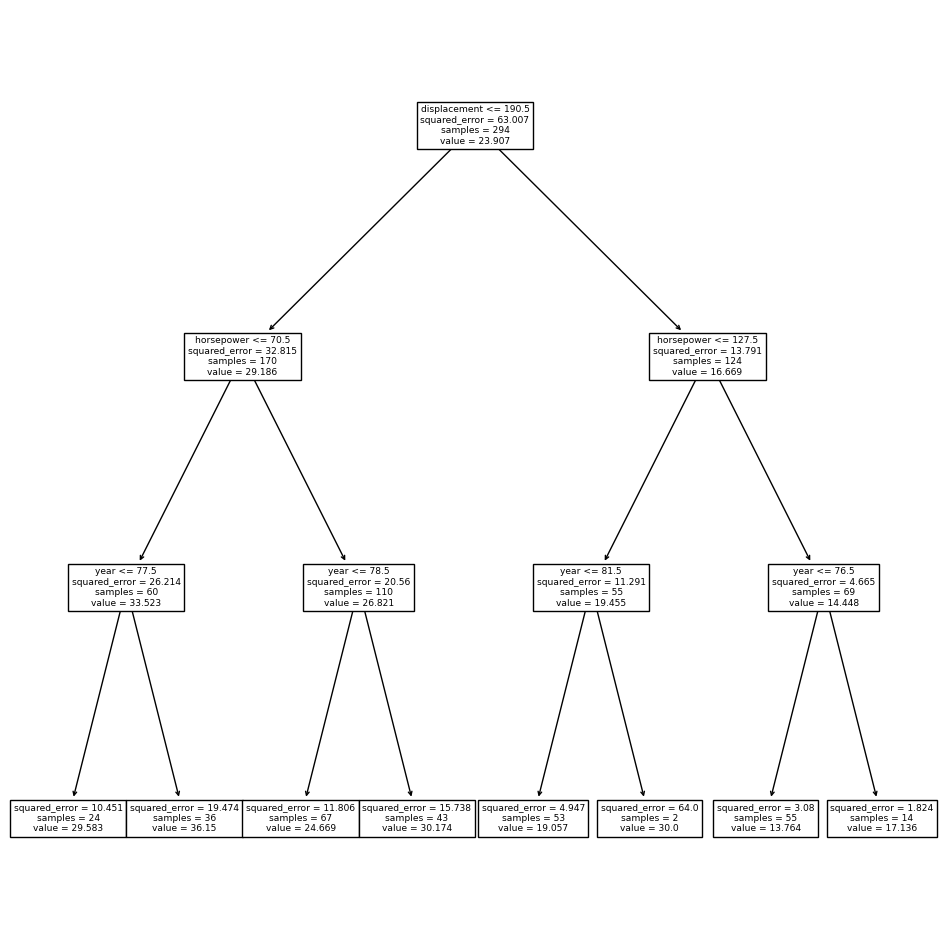

In [8]:
# Construct a graph of the tree

feature_names = list(X_train.columns)
ax = subplots(figsize=(12,12))[1]
plot_tree(tree1,
          feature_names=feature_names,
          ax=ax);

In [9]:
# Build a single tree with depth 3 BUT make sure each leaf has at least 10 records

tree2 = DTR(max_depth=3, min_samples_leaf=10)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

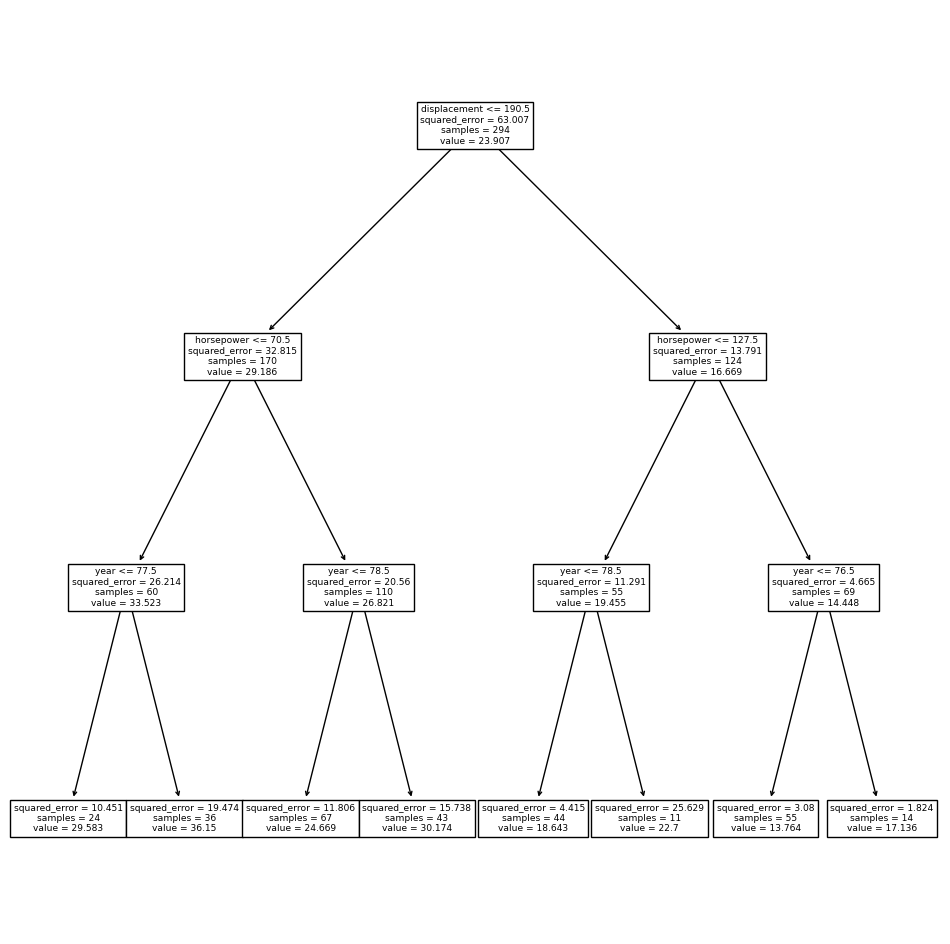

In [10]:
# Construct a graph of the tree

feature_names = list(X_train.columns)
ax = subplots(figsize=(12,12))[1]
plot_tree(tree2,
          feature_names=feature_names,
          ax=ax);

In [11]:
# Build a tree with 7 nodes (instead of depth=3)

tree3 = DTR(max_leaf_nodes=7)
tree3.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=7)

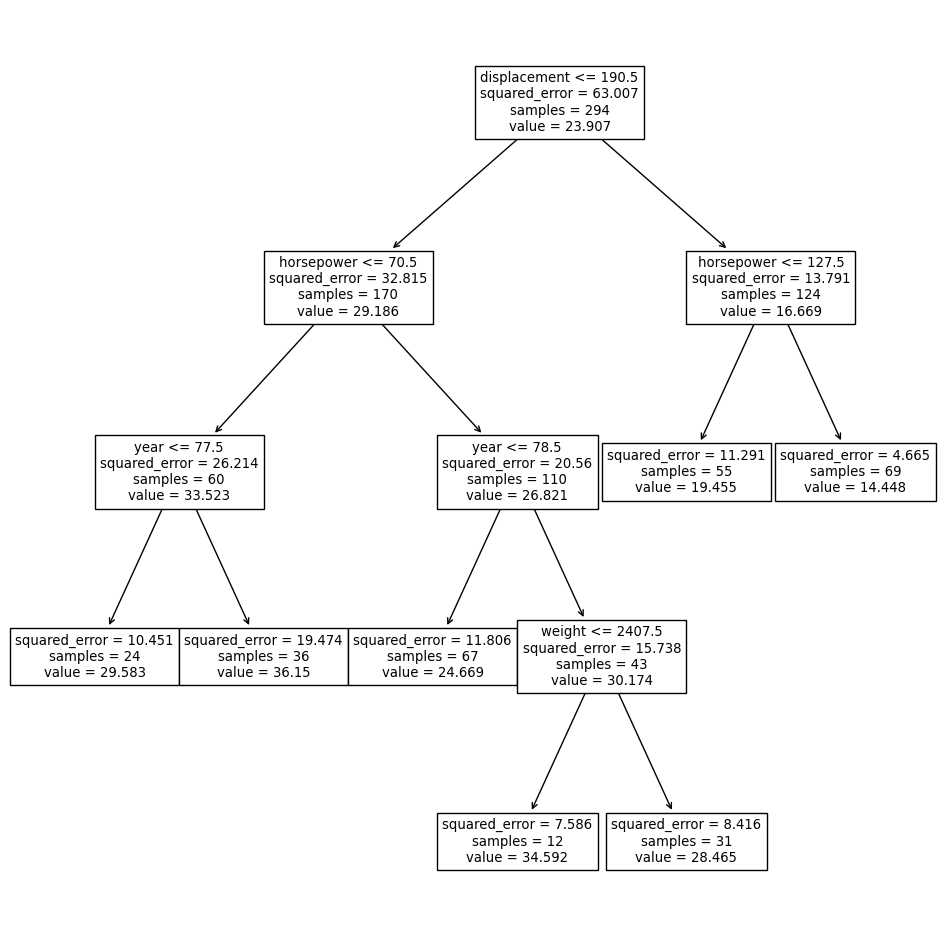

In [12]:
# Construct a graph of the tree

feature_names = list(X_train.columns)
ax = subplots(figsize=(12,12))[1]
plot_tree(tree3,
          feature_names=feature_names,
          ax=ax);

## Random Forest

In [16]:
# Build the model
# Documentation: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html

rf_auto = RF(max_features=6,
             n_estimators=10000,
             max_depth=10,
#             min_samples_leaf=2,
#             max_leaf_nodes=None,
             bootstrap=True,
             random_state=314)
rf_auto.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=6, n_estimators=10000,
                      random_state=314)

In [17]:
# MSE

y_hat_rf = rf_auto.predict(X_test)
mse_rf = np.mean((y_test - y_hat_rf)**2)
print('test mse: ',mse_rf)

test mse:  4.571350679105066


In [15]:
# Feature importance list

feature_imp = pd.DataFrame(
    {'importance':rf_auto.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
displacement,0.427322
weight,0.194763
cylinders,0.135611
year,0.120211
horsepower,0.109091
acceleration,0.010631
origin,0.002371


## Gradient Boosting

In [ ]:
# Build the model
# Documentation: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

gbm_auto = GBR(learning_rate=0.5,
               n_estimators=100,
               max_depth=5,
               random_state=314)
gbm_auto.fit(X_train, y_train)

In [ ]:
# MSE

y_hat_gbm = gbm_auto.predict(X_test)
mse_gbm = np.mean((y_test - y_hat_gbm)**2)
print('test mse: ',mse_gbm)

In [ ]:
# We can actually plot the "progress" of a GBM

test_error = np.zeros_like(gbm_auto.train_score_)
for idx, y_ in enumerate(gbm_auto.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(gbm_auto.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        gbm_auto.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

In [ ]:
# Feature importance list

feature_imp = pd.DataFrame(
    {'importance':gbm_auto.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)